# **1. Importing libraries and data files**



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics.pairwise import euclidean_distances
import pickle
from sklearn.model_selection import GridSearchCV, train_test_split



drive.mount('/content/drive')

train_Seqpath = '/content/drive/My Drive/Colab Notebooks/Data/train/train_sequences.fasta'
train_termspath = '/content/drive/My Drive/Colab Notebooks/Data/train/train_terms.tsv'
train_sembedpath = '/content/drive/My Drive/train_embeds.npy'
train_protids_path = '/content/drive/My Drive/Colab Notebooks/Data/train_ids.npy'
train_embeddings = np.load(train_sembedpath)
train_terms = pd.read_csv(train_termspath,sep="\t")


Mounted at /content/drive


## **2. Visualizing distances between Protein sequences before and after protein embedding and comparing them**

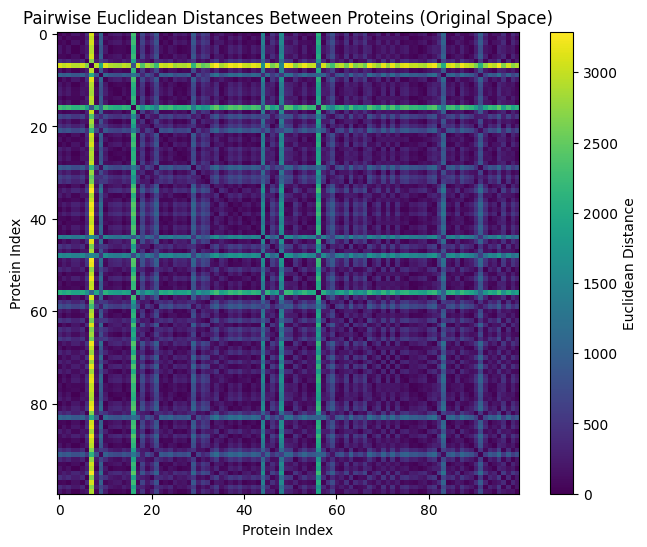

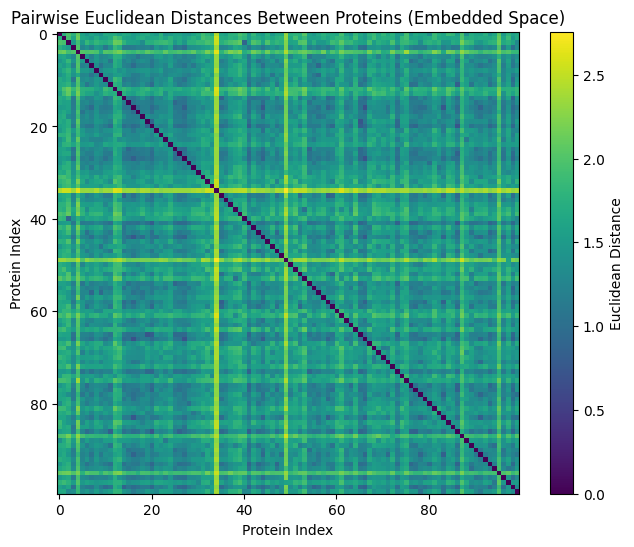

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from Bio import SeqIO
from sklearn.decomposition import PCA

# Function to calculate distances between protein pairs
def calculate_distances(sequences):
    distances = euclidean_distances(sequences)
    return distances

# Read protein sequences from FASTA file
def read_fasta_file(file_path, max_sequences=None):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
        if max_sequences and len(sequences) >= max_sequences:
            break
    return sequences

# Parameters
max_sequences = 100  # Maximum number of protein sequences to process

# Read protein sequences from FASTA file
protein_sequences = read_fasta_file(train_Seqpath, max_sequences)

# Convert sequences to numerical representation
sequences_numerical = np.array([len(seq) for seq in protein_sequences]).reshape(-1, 1)

# Calculate distances between protein pairs in the original space
distances_original = calculate_distances(sequences_numerical)

# Visualize distances in the original space
plt.figure(figsize=(8, 6))
plt.imshow(distances_original, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Euclidean Distance')
plt.title('Pairwise Euclidean Distances Between Proteins (Original Space)')
plt.xlabel('Protein Index')
plt.ylabel('Protein Index')
plt.show()

# Load embeddings from .npy file
embeddings = np.load(train_sembedpath)

# Limit the number of proteins to work on to match the ones read from the FASTA file
embeddings = embeddings[:max_sequences]

# Calculate distances between protein pairs in the embedded space
distances_embedded = calculate_distances(embeddings)

# Visualize distances in the embedded space
plt.figure(figsize=(8, 6))
plt.imshow(distances_embedded, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Euclidean Distance')
plt.title('Pairwise Euclidean Distances Between Proteins (Embedded Space)')
plt.xlabel('Protein Index')
plt.ylabel('Protein Index')
plt.show()


In [ ]:
# Print the shape of the loaded data to confirm
print("Loaded data shape:", train_embeddings.shape)

# converting embeddings numpy array(train_embeddings) into pandas dataframe.
column_num = train_embeddings.shape[1]
train_df = pd.DataFrame(train_embeddings, columns = ["Column_" + str(i) for i in range(1, column_num+1)])
print(train_df.shape)

train_df.head()

Loaded data shape: (142246, 1024)
(142246, 1024)


,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_1015,Column_1016,Column_1017,Column_1018,Column_1019,Column_1020,Column_1021,Column_1022,Column_1023,Column_1024
0,0.049488,-0.032935,0.032473,-0.033723,-0.059505,0.075936,-0.045860,-0.104476,-0.072112,0.038806,...,-0.046516,-0.028773,-0.021878,-0.097883,0.056475,0.080950,-0.020938,-0.043532,0.096463,0.073070
1,-0.044616,0.064925,-0.080263,-0.075338,-0.004731,0.025408,-0.024685,-0.016568,-0.038980,-0.033870,...,-0.040173,0.003925,0.006130,0.007362,-0.066848,0.106882,-0.030134,0.026724,0.027879,-0.048430
2,-0.020128,-0.049779,0.007894,-0.000829,-0.047737,0.086453,-0.038107,-0.036379,0.029611,0.045029,...,0.029388,0.008456,0.000697,0.013502,-0.005968,-0.011571,0.005704,-0.036103,0.007693,0.106234
3,-0.007515,0.060628,0.004045,0.027056,-0.021542,0.010380,-0.025064,-0.055834,0.068238,0.027764,...,0.020792,0.023307,0.009009,0.018211,0.020820,-0.031738,0.013279,-0.018357,0.008087,0.010917
4,0.013468,0.041516,0.018435,-0.035595,0.008770,0.018699,-0.015452,-0.038092,-0.038326,-0.012299,...,-0.044742,-0.025432,-0.060886,-0.026915,0.026342,0.017237,0.014731,-0.016861,-0.016272,0.037054


# **4. Visualizing the distribution of GO term occurences**

(5363863, 3)


<ipython-input-4-ec47229645ee>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=term_counts.index, y=term_counts.values, palette='viridis')


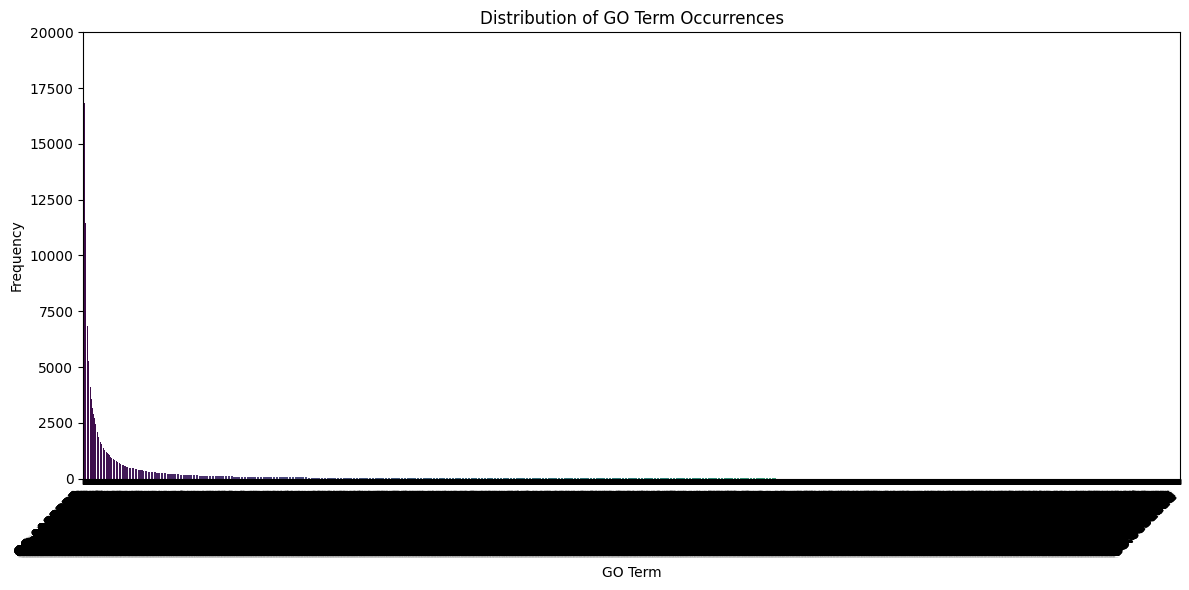

In [ ]:
print(train_terms.shape)

# Count the number of occurrences of each term
term_counts = train_terms['term'].value_counts()

# Plotting the distribution of term occurrences with limited y-axis
plt.figure(figsize=(12, 6))
sns.barplot(x=term_counts.index, y=term_counts.values, palette='viridis')
plt.title('Distribution of GO Term Occurrences')
plt.xlabel('GO Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 20000)
plt.tight_layout()
plt.show()

## **5. Selecting the 1500 most frequenet GO terms as labels and plotting the 100 most frequent ones**

<ipython-input-13-ab829d6fe34c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 6)


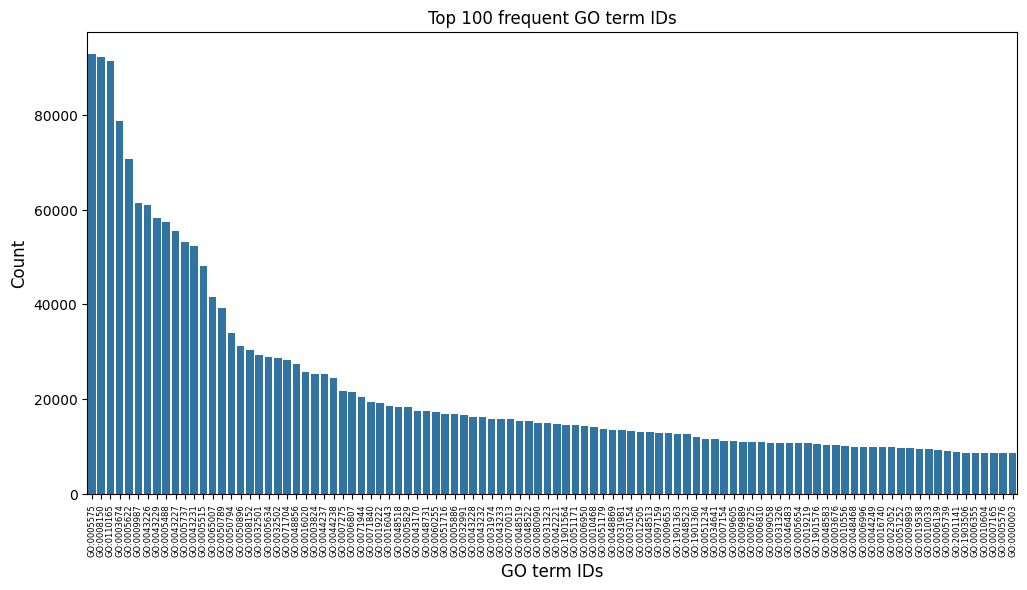

In [ ]:
# Select first 1500 values for plotting
plot_df = train_terms['term'].value_counts().iloc[:100]

figure, axis = plt.subplots(1, 1, figsize=(12, 6))

bp = sns.barplot(ax=axis, x=np.array(plot_df.index), y=plot_df.values)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 6)
axis.set_title('Top 100 frequent GO term IDs')
bp.set_xlabel("GO term IDs", fontsize = 12)
bp.set_ylabel("Count", fontsize = 12)
plt.show()

# saving the first 1500 most frequent GO term Ids into a list
# Set the limit for label
num_of_labels = 1500

# Take value counts in descending order and fetch first 1500 `GO term ID` as labels
labels = train_terms['term'].value_counts().index[:num_of_labels].tolist()

# Fetch the train_terms data for the relevant labels only
train_terms_updated = train_terms.loc[train_terms['term'].isin(labels)]


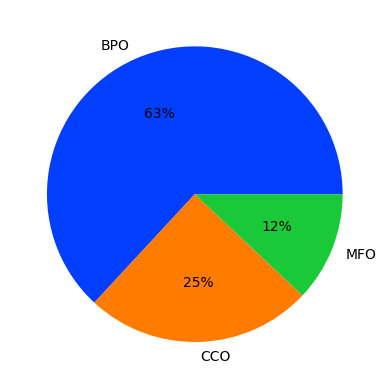

In [ ]:
pie_df = train_terms_updated['aspect'].value_counts()
palette_color = sns.color_palette('bright')
plt.pie(pie_df.values, labels=np.array(pie_df.index), colors=palette_color, autopct='%.0f%%')
plt.show()

In [ ]:
train_protein_ids = np.load(train_protids_path)
print(train_protein_ids.shape)
train_protein_ids[:5]


(142246,)


array(['P20536', 'O73864', 'O95231', 'A0A0B4J1F4', 'P54366'], dtype='<U10')

In [ ]:
import progressbar

# Filepath to save the pickle file
filepath = "/content/drive/My Drive/Colab Notebooks/Data/labels_df.pkl"

# Setup progressbar settings.
bar = progressbar.ProgressBar(maxval=num_of_labels, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

# Create an empty dataframe of required size for storing the labels,
# i.e, train_size x num_of_labels (142246 x 1500)
train_size = train_protein_ids.shape[0]  # len(X)
train_labels = np.zeros((train_size, num_of_labels))
# Convert from numpy to pandas series for better handling
series_train_protein_ids = pd.Series(train_protein_ids)

# Loop through each label
for i in range(num_of_labels):
    # For each label, fetch the corresponding train_terms data
    n_train_terms = train_terms_updated[train_terms_updated['term'] == labels[i]]

    # Fetch all the unique EntryId aka proteins related to the current label (GO term ID)
    label_related_proteins = n_train_terms['EntryID'].unique()

    # In the series_train_protein_ids pandas series, if a protein is related
    # to the current label, then mark it as 1, else 0.
    # Replace the ith column of train_Y with that pandas series.
    train_labels[:, i] = series_train_protein_ids.isin(label_related_proteins).astype(float)

    # Progress bar percentage increase
    bar.update(i + 1)

# Notify the end of progress bar
bar.finish()

# Convert train_Y numpy into pandas dataframe
labels_df = pd.DataFrame(data=train_labels, columns=labels)
print(labels_df.shape)

# Save the labels_df to a pickle file
labels_df.to_pickle(filepath)
print(f"labels_df saved to {filepath}")

[========================================================================] 100%


(142246, 1500)
labels_df saved to /content/drive/My Drive/Colab Notebooks/Data/labels_df.pkl


In [ ]:
labels_df = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/Data/pkl files/labels_df.pkl')
print(labels_df.shape)

(142246, 1500)


In [ ]:

# First, split the data into a training set and a temporary testing set
X_train, X_temp, y_train, y_temp = train_test_split(
    train_df, labels_df, test_size=0.2, random_state=42
)

# Next, split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Display the dimensions of the sets to verify proper splitting
print(f"Training set dimensions: {X_train.shape}, {y_train.shape}")
print(f"Validation set dimensions: {X_val.shape}, {y_val.shape}")
print(f"Test set dimensions: {X_test.shape}, {y_test.shape}")

Training set dimensions: (113796, 1024), (113796, 1500)
Validation set dimensions: (14225, 1024), (14225, 1500)
Test set dimensions: (14225, 1024), (14225, 1500)


# **DNN with Weighted Cross-Entropy as loss function**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, auc
import tensorflow as tf
import pandas as pd
import numpy as np

import tensorflow as tf
import pandas as pd
import numpy as np

# Assuming y_true is a symbolic tensor representing true labels

# Read the GO term weights from AI.txt
weights_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/IA.txt', sep='\t', header=None, names=['GO_term', 'weight'])

# Filter weights to keep only those GO terms present in the labels_df columns
filtered_weights = weights_df[weights_df['GO_term'].isin(labels_df.columns)]

# Create a dictionary mapping GO term IDs to weights
go_weights = dict(zip(filtered_weights['GO_term'], filtered_weights['weight']))

# Map weights to the columns of labels_df
column_weights = np.array([go_weights[term] if term in go_weights else 0 for term in labels_df.columns])
# Define a custom loss function to incorporate class weights
def weighted_binary_crossentropy(y_true, y_pred):
    weights = tf.constant(column_weights, dtype=tf.float32)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
    bce = y_true * tf.math.log(y_pred + tf.keras.backend.epsilon())
    bce += (1 - y_true) * tf.math.log(1 - y_pred + tf.keras.backend.epsilon())
    bce = -bce
    weighted_bce = bce * weights
    return tf.reduce_mean(weighted_bce)

INPUT_SHAPE = [X_train.shape[1]]
BATCH_SIZE = 500
num_of_labels= 1500
# Define the DNN model with your proposed architecture
model_dnn2 = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(units=1024, activation=None, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(units=1000, activation=None, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(units=512, activation=None, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.Dense(units=num_of_labels, activation='sigmoid')
])
# Compile model
model_dnn2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss= weighted_binary_crossentropy,
    metrics=['binary_accuracy', tf.keras.metrics.AUC()],
)


history2 = model_dnn2.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(X_val, y_val)
)
model_dnn2.save('/content/drive/My Drive/Colab Notebooks/Data/dnn2_model.h5')


Epoch 1/50
228/228 [==============================] - 91s 378ms/step - loss: 1.9247 - binary_accuracy: 0.9047 - auc: 0.6090 - val_loss: 1.1156 - val_binary_accuracy: 0.9600 - val_auc: 0.7142
Epoch 2/50
228/228 [==============================] - 80s 352ms/step - loss: 0.5358 - binary_accuracy: 0.9599 - auc: 0.7702 - val_loss: 0.3288 - val_binary_accuracy: 0.9626 - val_auc: 0.7934
Epoch 3/50
228/228 [==============================] - 83s 364ms/step - loss: 0.1815 - binary_accuracy: 0.9604 - auc: 0.8262 - val_loss: 0.1382 - val_binary_accuracy: 0.9620 - val_auc: 0.8277
Epoch 4/50
228/228 [==============================] - 81s 357ms/step - loss: 0.0980 - binary_accuracy: 0.9604 - auc: 0.8481 - val_loss: 0.0932 - val_binary_accuracy: 0.9611 - val_auc: 0.8514
Epoch 5/50
228/228 [==============================] - 82s 360ms/step - loss: 0.0808 - binary_accuracy: 0.9605 - auc: 0.8608 - val_loss: 0.0805 - val_binary_accuracy: 0.9607 - val_auc: 0.8659
Epoch 6/50
228/228 [=========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


445/445 [==============================] - 5s 12ms/step


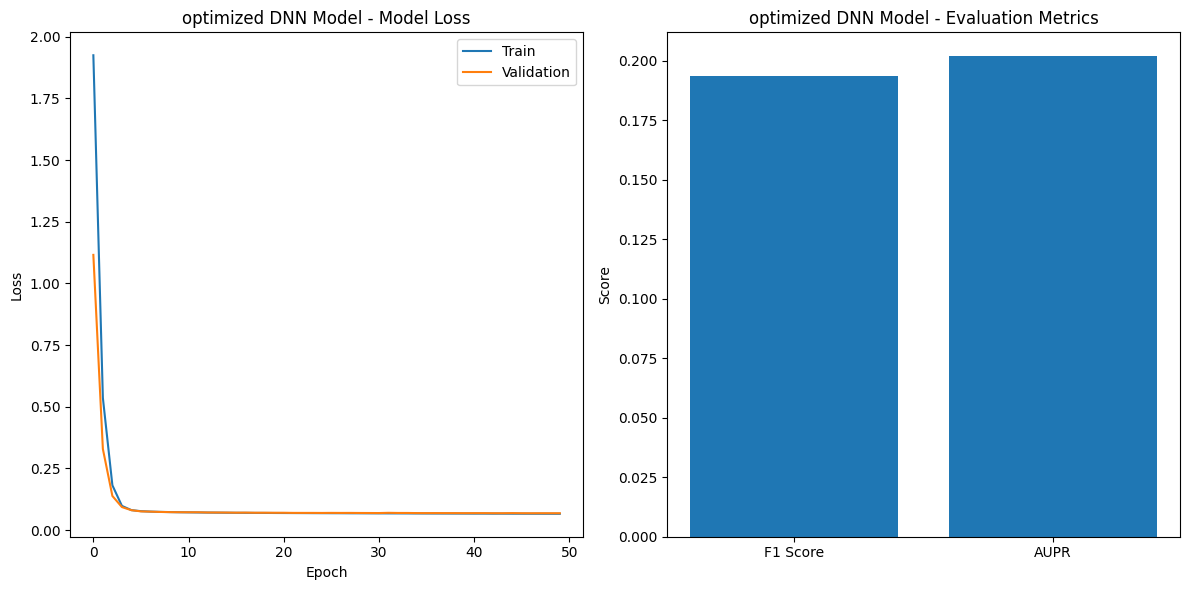

DNN Model Evaluation:
Loss: 0.06819672137498856
Binary Accuracy: 0.9607031345367432
AUPR: 0.20182420733655373
F1 Score: 0.19337386486070493


In [ ]:
from sklearn.metrics import average_precision_score
# Evaluate the Dense model
dnn2_scores = model_dnn2.evaluate(X_test, y_test)
# Calculate F1 score and AUPR for the Dense model
dnn2_predictions = model_dnn2.predict(X_test)
dnn2_f1 = f1_score(y_test, np.round(dnn2_predictions), average='micro')
dnn2_aupr = average_precision_score(y_test, dnn2_predictions)
# Define the plot_results function
def plot_results(history, scores, f1, aupr, model_name):
    plt.figure(figsize=(12, 6))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot F1 score and AUPR
    plt.subplot(1, 2, 2)
    plt.bar(['F1 Score', 'AUPR'], [f1, aupr])
    plt.title(f'{model_name} - Evaluation Metrics')
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()
# Plot results for the Dense model
plot_results(history2, dnn2_scores, dnn2_f1, dnn2_aupr, 'optimized DNN Model')


# Print and save evaluation metrics
print("DNN Model Evaluation:")
print("Loss:", dnn2_scores[0])
print("Binary Accuracy:", dnn2_scores[1])
print("AUPR:", dnn2_aupr)
print("F1 Score:", dnn2_f1)

In [ ]:

!pip uninstall imblearn


!pip install scikit-learn==1.2.2
!pip3 install imblearn --ignore-installed scikit-learn
!pip install scikeras

import sklearn
import scikeras
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Check for NaN values in y_balanced
nan_mask = y_train.isna().any(axis=1)

# Filter out rows with NaN values in y_balanced
X_train = X_train[~nan_mask]
y_train = y_train[~nan_mask]

# Optionally convert back to numpy arrays if needed
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

print("X_balanced shape:", X_train.shape)
print("y_balanced shape:", y_train.shape)


X_balanced shape: (99854, 1024)
y_balanced shape: (99854, 1500)


In [ ]:
INPUT_SHAPE = [X_train.shape[1]]
BATCH_SIZE = 500
num_of_labels= 1500
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_recall_curve, auc, average_precision_score
from tensorflow.keras.utils import plot_model
model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(units=1024, activation=None, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(units=1000, activation=None, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(units=512, activation=None, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.Dense(units=num_of_labels, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy', tf.keras.metrics.AUC()],
)

history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val, y_val)
)

# Evaluate the Dense model
dense_scores = model.evaluate(X_test, y_test)

# Calculate F1 score and AUPR for the Dense model
dense_predictions = model.predict(X_test)
dense_f1 = f1_score(y_test, np.round(dense_predictions), average='micro')
dense_aupr = average_precision_score(y_test, dense_predictions)



Epoch 1/20
228/228 [==============================] - 15s 59ms/step - loss: 0.2950 - binary_accuracy: 0.9746 - auc_1: 0.8390 - val_loss: 0.0883 - val_binary_accuracy: 0.9800 - val_auc_1: 0.8400
Epoch 2/20
228/228 [==============================] - 13s 57ms/step - loss: 0.0763 - binary_accuracy: 0.9806 - auc_1: 0.8967 - val_loss: 0.0804 - val_binary_accuracy: 0.9804 - val_auc_1: 0.8771
Epoch 3/20
228/228 [==============================] - 13s 57ms/step - loss: 0.0763 - binary_accuracy: 0.9806 - auc_1: 0.9003 - val_loss: 0.0781 - val_binary_accuracy: 0.9805 - val_auc_1: 0.8936
Epoch 4/20
228/228 [==============================] - 13s 57ms/step - loss: 0.0762 - binary_accuracy: 0.9806 - auc_1: 0.9023 - val_loss: 0.0789 - val_binary_accuracy: 0.9802 - val_auc_1: 0.8995
Epoch 5/20
228/228 [==============================] - 13s 58ms/step - loss: 0.0759 - binary_accuracy: 0.9806 - auc_1: 0.9037 - val_loss: 0.0766 - val_binary_accuracy: 0.9805 - val_auc_1: 0.9028
Epoch 6/20
228/228 [==========

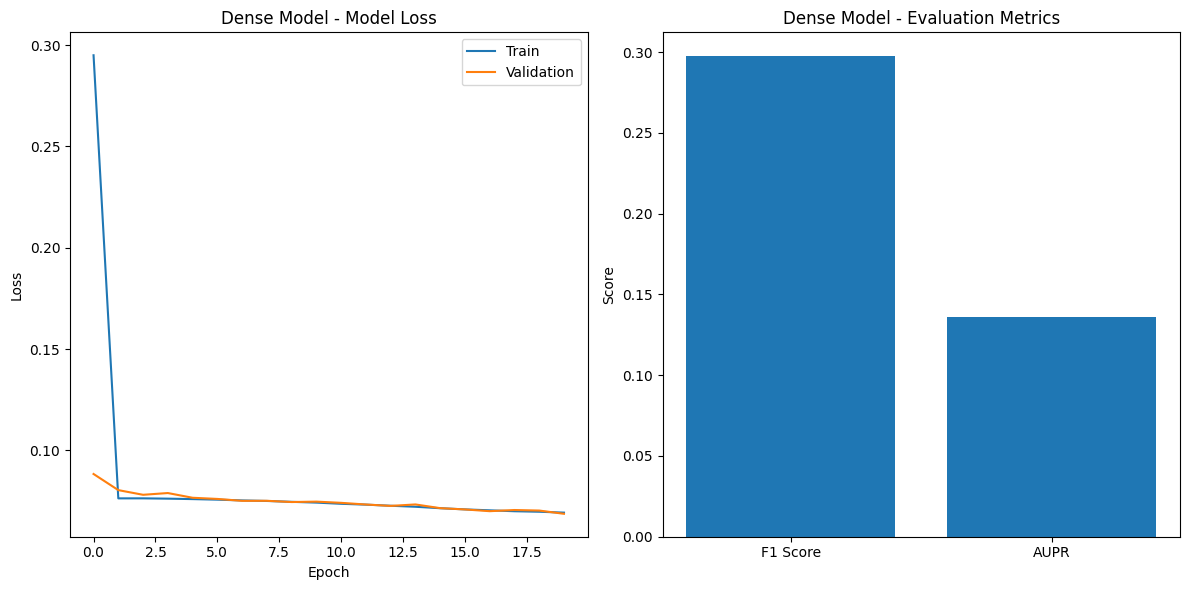

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Dense Model Evaluation:
Loss: 0.06864351034164429
Binary Accuracy: 0.9807997941970825
AUPR: 0.1361335570067314
F1 Score: 0.297362702573839


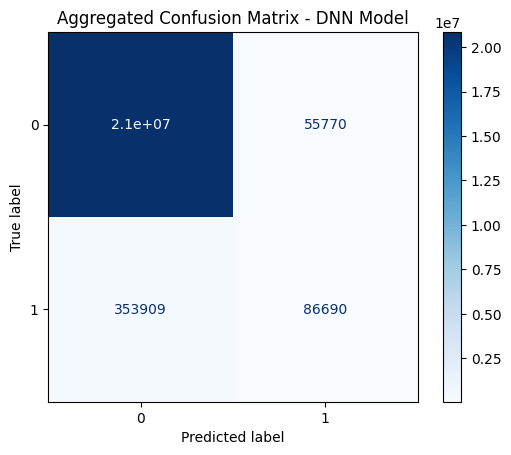

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization_5 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 1000)             

In [ ]:
# Define the plot_results function
def plot_results(history, scores, f1, aupr, model_name):
    plt.figure(figsize=(12, 6))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot F1 score and AUPR
    plt.subplot(1, 2, 2)
    plt.bar(['F1 Score', 'AUPR'], [f1, aupr])
    plt.title(f'{model_name} - Evaluation Metrics')
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()
# Plot results for the Dense model
plot_results(history, dense_scores, dense_f1, dense_aupr, 'Dense Model')

# Save the Dense model
model.save('/content/drive/My Drive/Colab Notebooks/Data/dense_model.h5')

# Print and save evaluation metrics
print("Dense Model Evaluation:")
print("Loss:", dense_scores[0])
print("Binary Accuracy:", dense_scores[1])
print("AUPR:", dense_aupr)
print("F1 Score:", dense_f1)

if isinstance(y_test, pd.DataFrame):
    y_test = y_test.to_numpy()
if isinstance(dense_predictions, pd.DataFrame):
    dense_predictions = dense_predictions.to_numpy()

# Round the predictions to get binary outcomes
rounded_predictions = np.round(dense_predictions)

# Reshape the arrays into a single dimension
y_test_flat = y_test.ravel()
rounded_predictions_flat = rounded_predictions.ravel()

# Generate the confusion matrix
cm = confusion_matrix(y_test_flat, rounded_predictions_flat)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Aggregated Confusion Matrix - DNN Model')
plt.show()

model.summary()



In [ ]:
# Save the Dense model
model.save('/content/drive/My Drive/Colab Notebooks/Data/dense_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_recall_curve, auc, average_precision_score
from tensorflow.keras.utils import plot_model

INPUT_SHAPE = [X_train.shape[1]]
BATCH_SIZE = 300
num_of_labels= 1500
# Build the model
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Reshape((INPUT_SHAPE[0], 1), input_shape=INPUT_SHAPE),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),

    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(num_of_labels, activation='sigmoid')
])
# Compile the model
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy', tf.keras.metrics.AUC()]
)

# Train the model
history_cnn = model_cnn.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=10,
    validation_data=(X_val, y_val)
)


# Evaluate the CNN model
cnn_scores = model_cnn.evaluate(X_test, y_test)
# Calculate F1 score and AUPR for the CNN model
cnn_predictions = model_cnn.predict(X_test)

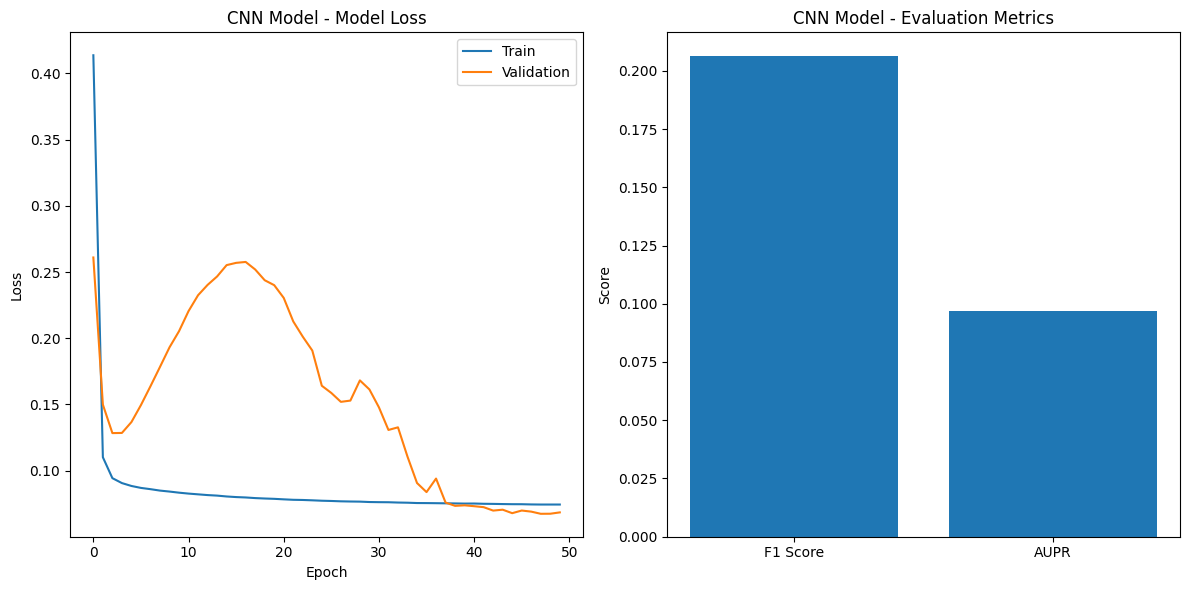

CNN Model Evaluation:
Loss: 0.06850693374872208
Binary Accuracy: 0.9804583787918091
AUPR: 0.09667464848138438
F1 Score: 0.20619188680825787


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, auc
from sklearn.metrics import average_precision_score  # Import average_precision_score

cnn_f1 = f1_score(y_test, np.round(cnn_predictions), average='micro')
cnn_aupr = average_precision_score(y_test, cnn_predictions)

# Define the plot_results function
def plot_results(history, scores, f1, aupr, model_name):
    plt.figure(figsize=(12, 6))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot F1 score and AUPR
    plt.subplot(1, 2, 2)
    plt.bar(['F1 Score', 'AUPR'], [f1, aupr])
    plt.title(f'{model_name} - Evaluation Metrics')
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()
# Plot results for the CNN model
plot_results(history_cnn, cnn_scores, cnn_f1, cnn_aupr, 'CNN Model')

# Save the CNN model
model_cnn.save('/content/drive/My Drive/Colab Notebooks/Data/cnn_model.h5')

# Print and save evaluation metrics
print("CNN Model Evaluation:")
print("Loss:", cnn_scores[0])
print("Binary Accuracy:", cnn_scores[1])
print("AUPR:", cnn_aupr)
print("F1 Score:", cnn_f1)

# Save evaluation metrics to a text file
with open('cnn_model_metrics.txt', 'w') as f:
    f.write("CNN Model Evaluation:\n")
    f.write(f"Loss: {cnn_scores[0]}\n")
    f.write(f"Binary Accuracy: {cnn_scores[1]}\n")
    f.write(f"AUPR: {cnn_aupr}\n")
    f.write(f"F1 Score: {cnn_f1}\n")

if isinstance(y_test, pd.DataFrame):
    y_test = y_test.to_numpy()
if isinstance(cnn_predictions, pd.DataFrame):
    cnn_predictions = cnn_predictions.to_numpy()

# Round the predictions to get binary outcomes
rounded_predictions = np.round(cnn_predictions)

# Reshape the arrays into a single dimension
y_test_flat = y_test.ravel()
rounded_predictions_flat = rounded_predictions.ravel()

# Generate the confusion matrix
cm = confusion_matrix(y_test_flat, rounded_predictions_flat)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Aggregated Confusion Matrix - CNN Model')
plt.show()

cnn_model.summary()

# Visualiser l'architecture
plot_model(cnn_model, to_file='cnn_model_structure.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='CNN_model_structure.png')

In [ ]:
import progressbar
import numpy as np
import pandas as pd

# Function to create label matrix for a specific aspect
def create_label_matrix(aspect_df, protein_ids, labels, num_of_labels, aspect_name):
    # Create an empty array of required size for storing the labels
    train_size = protein_ids.shape[0]
    train_labels = np.zeros((train_size, num_of_labels))

    # Convert from numpy to pandas series for better handling
    series_protein_ids = pd.Series(protein_ids)

    # Setup progressbar settings
    bar = progressbar.ProgressBar(maxval=num_of_labels,
                                  widgets=[f'{aspect_name} ', progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()

    # Loop through each label
    for i in range(num_of_labels):
        # For each label, fetch the corresponding data
        n_train_terms = aspect_df[aspect_df['term'] == labels[i]]

        # Fetch all the unique EntryID aka proteins related to the current label (GO term ID)
        label_related_proteins = n_train_terms['EntryID'].unique()

        # In the series_protein_ids pandas series, if a protein is related to the current label, then mark it as 1, else 0
        train_labels[:, i] = series_protein_ids.isin(label_related_proteins).astype(float)

        # Progress bar percentage increase
        bar.update(i + 1)

    # Notify the end of progress bar
    bar.finish()

    # Convert numpy array into pandas dataframe
    labels_df = pd.DataFrame(data=train_labels, columns=labels)
    return labels_df

# Separate the data by aspect
bp_terms = train_terms_updated[train_terms_updated['aspect'] == 'BPO']
mf_terms = train_terms_updated[train_terms_updated['aspect'] == 'MFO']
cc_terms = train_terms_updated[train_terms_updated['aspect'] == 'CCO']

# Get the unique labels for each aspect
bp_labels = bp_terms['term'].unique()
mf_labels = mf_terms['term'].unique()
cc_labels = cc_terms['term'].unique()

# Debugging prints to ensure the labels are being fetched correctly
print(f"BP Labels: {len(bp_labels)} terms")
print(f"MF Labels: {len(mf_labels)} terms")
print(f"CC Labels: {len(cc_labels)} terms")

# Create label matrices for each aspect
bp_labels_df = create_label_matrix(bp_terms, train_protein_ids, bp_labels, len(bp_labels), "BPO")
mf_labels_df = create_label_matrix(mf_terms, train_protein_ids, mf_labels, len(mf_labels), "MFO")
cc_labels_df = create_label_matrix(cc_terms, train_protein_ids, cc_labels, len(cc_labels), "CCO")

# Combine the label dataframes if needed
combined_labels_df = pd.concat([bp_labels_df, mf_labels_df, cc_labels_df], axis=1)
print(combined_labels_df.shape)
combined_labels_df.head()


BPO [                                                                    ]   0%

BP Labels: 1087 terms
MF Labels: 193 terms
CC Labels: 220 terms


BPO [====================================================================] 100%
MFO [====================================================================] 100%
CCO [====================================================================] 100%


(142246, 1500)


,GO:0008152,GO:0034655,GO:0044270,GO:0006753,GO:0044237,GO:1901360,GO:0008150,GO:1901564,GO:1901565,GO:0009117,...,GO:0070062,GO:0044391,GO:0022626,GO:0015934,GO:0022625,GO:0031976,GO:0042170,GO:0009534,GO:0015935,GO:0000313
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
# Function to split data into train, validation, and test sets
def split_data(protein_ids, labels_df, test_size=0.2, val_size=0.1):
    X_train, X_temp, y_train, y_temp = train_test_split(protein_ids, labels_df, test_size=test_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size/(test_size + val_size), random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Split data for each aspect
bp_X_train, bp_X_val, bp_X_test, bp_y_train, bp_y_val, bp_y_test = split_data(train_protein_ids, bp_labels_df)
mf_X_train, mf_X_val, mf_X_test, mf_y_train, mf_y_val, mf_y_test = split_data(train_protein_ids, mf_labels_df)
cc_X_train, cc_X_val, cc_X_test, cc_y_train, cc_y_val, cc_y_test = split_data(train_protein_ids, cc_labels_df)

# Print the shapes of the splits for each aspect
def print_shapes(aspect_name, X_train, X_val, X_test, y_train, y_val, y_test):
    print(f"{aspect_name} Shapes:")
    print(f"  X_train: {X_train.shape}")
    print(f"  X_val: {X_val.shape}")
    print(f"  X_test: {X_test.shape}")
    print(f"  y_train: {y_train.shape}")
    print(f"  y_val: {y_val.shape}")
    print(f"  y_test: {y_test.shape}")

print_shapes("BP", bp_X_train, bp_X_val, bp_X_test, bp_y_train, bp_y_val, bp_y_test)
print_shapes("MF", mf_X_train, mf_X_val, mf_X_test, mf_y_train, mf_y_val, mf_y_test)
print_shapes("CC", cc_X_train, cc_X_val, cc_X_test, cc_y_train, cc_y_val, cc_y_test)

BP Shapes:
  X_train: (113796,)
  X_val: (18966,)
  X_test: (9484,)
  y_train: (113796, 1087)
  y_val: (18966, 1087)
  y_test: (9484, 1087)
MF Shapes:
  X_train: (113796,)
  X_val: (18966,)
  X_test: (9484,)
  y_train: (113796, 193)
  y_val: (18966, 193)
  y_test: (9484, 193)
CC Shapes:
  X_train: (113796,)
  X_val: (18966,)
  X_test: (9484,)
  y_train: (113796, 220)
  y_val: (18966, 220)
  y_test: (9484, 220)
